In [57]:
from keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def function_1(x):
  return 3 * np.sin(np.pi*x)

def function_2(x):
  return 1 + 2*x + 4*(x**3)

In [59]:
def selector(n, x):
  if n == 1:
    return function_1(x)
  elif n == 2:
    return function_2(x)
 

In [60]:
function = 2

In [61]:
X = (np.random.rand(500)*2)-1
X = np.sort(X)
X = X.reshape(500,1)
Y = selector(function, X)

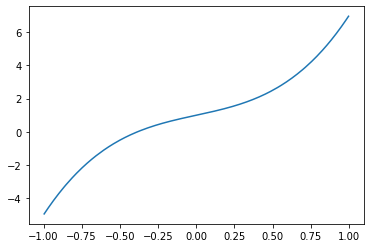

In [62]:
plt.plot(X,Y)

In [63]:
model = models.Sequential()
model.add(layers.Dense(2, activation = 'tanh', input_shape = (1, )))
model.add(layers.Dense(4, activation = 'tanh'))
model.add(layers.Dense(8, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'linear'))

In [64]:
model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['mae'])

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 4         
                                                                 
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 8)                 40        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [66]:
X_val = (np.random.rand(500)*2)-1
X_val = np.sort(X_val)
X_val = X_val.reshape(500,1)
Y_val = selector(function, X_val)

In [67]:
history = model.fit(X, Y,
          epochs = 700,
          batch_size = 100,
          validation_data = (X_val, Y_val))

Epoch 1/700
5/5 [==============================] - 1s 36ms/step - loss: 7.9187 - mae: 2.1784 - val_loss: 8.4093 - val_mae: 2.3493
Epoch 2/700
5/5 [==============================] - 0s 9ms/step - loss: 7.5992 - mae: 2.1254 - val_loss: 8.1423 - val_mae: 2.3066
Epoch 3/700
5/5 [==============================] - 0s 8ms/step - loss: 7.3699 - mae: 2.0865 - val_loss: 7.9130 - val_mae: 2.2690
Epoch 4/700
5/5 [==============================] - 0s 12ms/step - loss: 7.1679 - mae: 2.0515 - val_loss: 7.7019 - val_mae: 2.2336
Epoch 5/700
5/5 [==============================] - 0s 11ms/step - loss: 6.9797 - mae: 2.0169 - val_loss: 7.5028 - val_mae: 2.1996
Epoch 6/700
5/5 [==============================] - 0s 9ms/step - loss: 6.7999 - mae: 1.9844 - val_loss: 7.3090 - val_mae: 2.1656
Epoch 7/700
5/5 [==============================] - 0s 12ms/step - loss: 6.6258 - mae: 1.9517 - val_loss: 7.1216 - val_mae: 2.1320
Epoch 8/700
5/5 [==============================] - 0s 9ms/step - loss: 6.4566 - mae: 1.9188 -

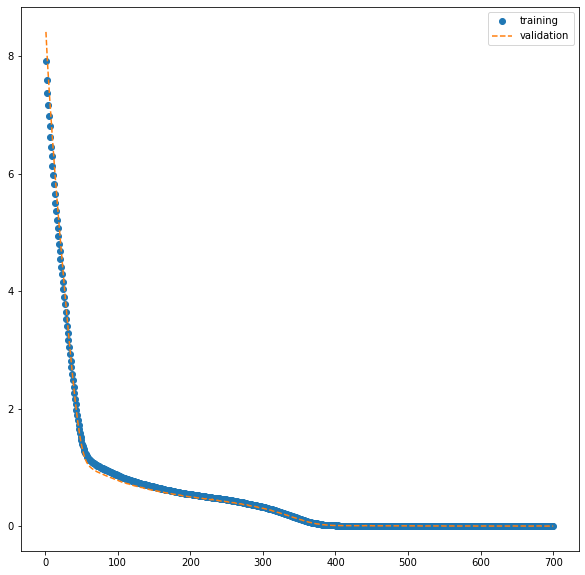

In [68]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [69]:
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mae'])

In [70]:
X_val = (np.random.rand(500)*2)-1
X_val = np.sort(X_val)
X_val = X_val.reshape(500,1)
Y_val = selector(function, X_val)

In [71]:
history = model.fit(X, Y,
          epochs = 500,
          batch_size = 100,
          validation_data = (X_val, Y_val))

Epoch 1/500
5/5 [==============================] - 0s 34ms/step - loss: 0.0016 - mae: 0.0264 - val_loss: 0.0020 - val_mae: 0.0302
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0016 - mae: 0.0259 - val_loss: 0.0010 - val_mae: 0.0218
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 8.6156e-04 - val_mae: 0.0213
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0011 - mae: 0.0218 - val_loss: 0.0012 - val_mae: 0.0254
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 9.5675e-04 - mae: 0.0213 - val_loss: 8.4690e-04 - val_mae: 0.0210
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0222 - val_loss: 8.1770e-04 - val_mae: 0.0207
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 8.8377e-04 - mae: 0.0208 - val_loss: 8.6959e-04 - val_mae: 0.0216
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss:

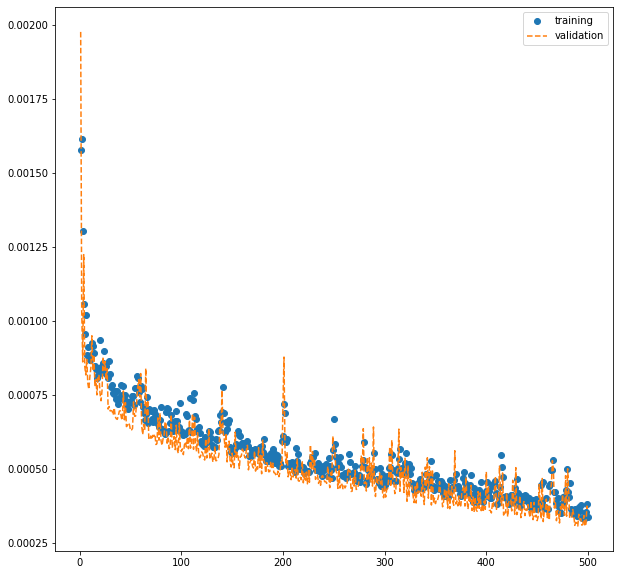

In [72]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [73]:
X_test = (np.random.rand(500)*2)-1
X_test = np.sort(X_test)
X_test = X_test.reshape(500,1)

In [74]:
a = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


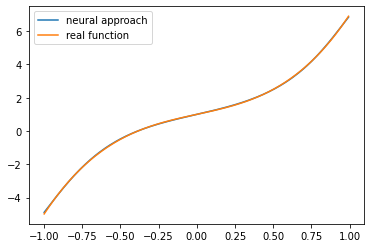

In [75]:
plt.plot(X_test, a, label = 'neural approach')
plt.plot(X_test, selector(function, X_test), label = 'real function')
plt.legend()
plt.show()